In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "http://stat.columbia.edu/~rachel/datasets/nyt1.csv"
data = pd.read_csv(url)

# Inspect the first few rows of the dataset
print(data.head())
# Step 1: Create a new variable `age_group`
age_bins = [0, 18, 24, 34, 44, 54, 64, np.inf]
age_labels = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
#The pd.cut function is used to segment and sort data values into bins.
#bins=age_bins specifies the edges of the bins.
#labels=age_labels assigns labels to each bin.
#right=False specifies that the bins are left-inclusive (i.e., the interval includes the left bin edge, but not the right edge).

   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1


/tmp/ipykernel_15195/1770792355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CTR'].fillna(0, inplace=True)  # Fill NaN values with 0


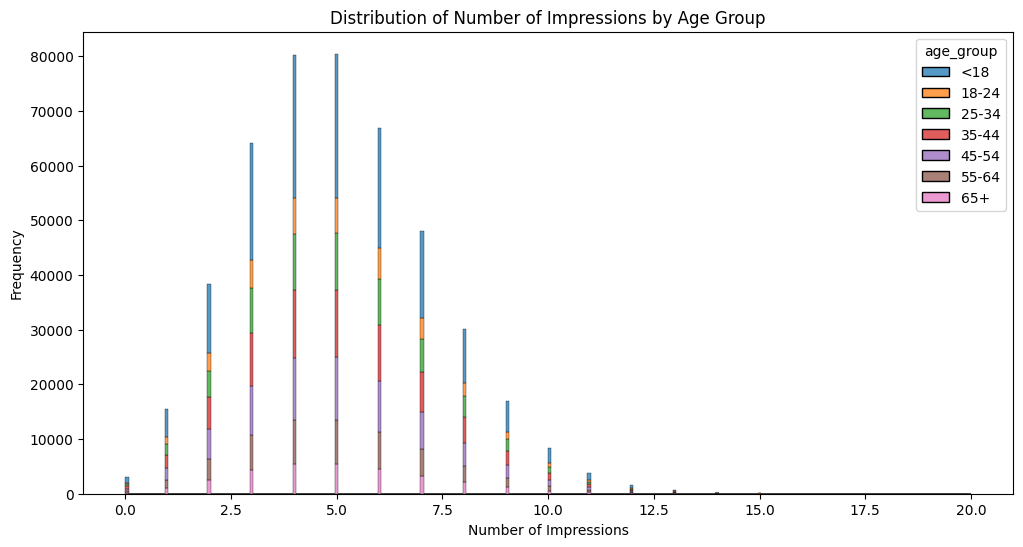

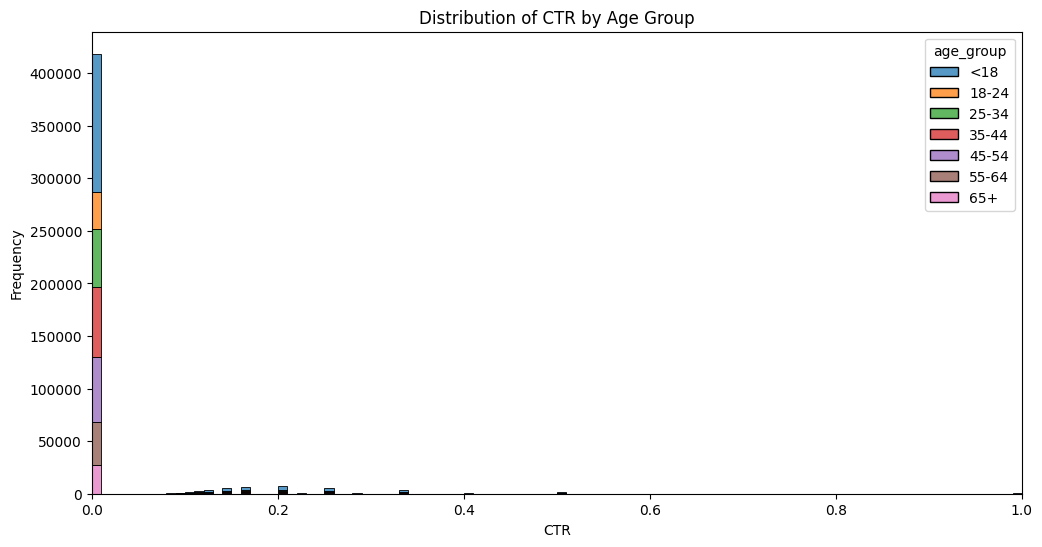

In [6]:
data['CTR'] = data['Clicks'] / data['Impressions']
data['CTR'].fillna(0, inplace=True)  # Fill NaN values with 0

# Plot the number of impressions for each age group
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Impressions', hue='age_group', multiple='stack')
plt.title('Distribution of Number of Impressions by Age Group')
plt.xlabel('Number of Impressions')
plt.ylabel('Frequency')
plt.show()

# Plot the CTR for each age group
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='CTR', hue='age_group', multiple='stack', binwidth=0.01)
plt.title('Distribution of CTR by Age Group')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit the x-axis to [0, 1] for better visualization
plt.show()

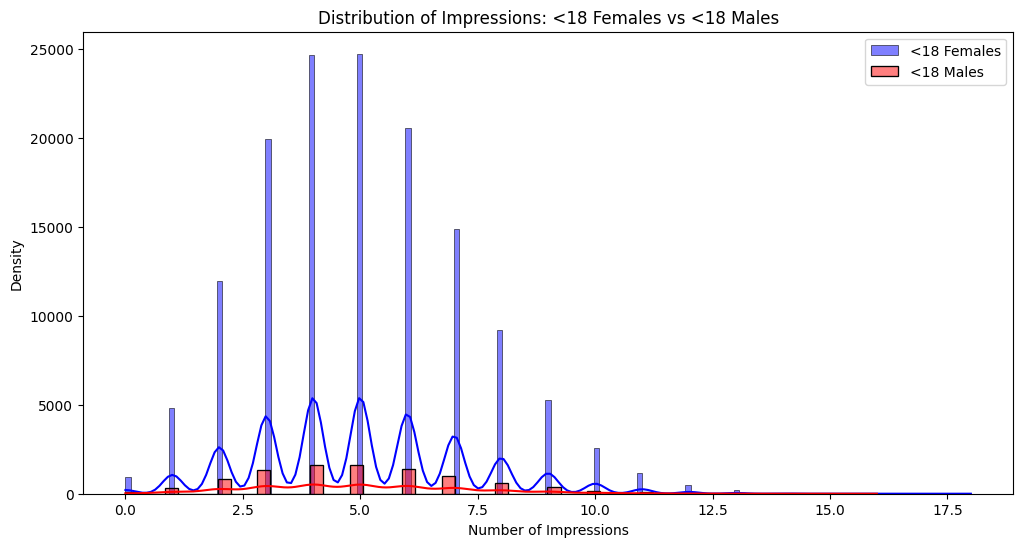

In [7]:
# Step 3: Define a new variable to segment users based on their click behavior
data['click_behavior'] = pd.cut(data['Clicks'], bins=[-1, 0, 5, 10, np.inf], labels=['No Clicks', '1-5 Clicks', '6-10 Clicks', '11+ Clicks'])

# Explore data and make visual and quantitative comparisons
# Example: <18 males vs <18 females
plt.figure(figsize=(12, 6))
sns.histplot(data=data[(data['Gender'] == 0) & (data['age_group'] == "<18")], x='Impressions', color='blue', label='<18 Females', kde=True)
sns.histplot(data=data[(data['Gender'] == 1) & (data['age_group'] == "<18")], x='Impressions', color='red', label='<18 Males', kde=True)
plt.title('Distribution of Impressions: <18 Females vs <18 Males')
plt.xlabel('Number of Impressions')
plt.ylabel('Density')
plt.legend()
plt.show()